### C2C Jay Stearns
### C2C Peter Ye
### C2C John Hermanson
### Documentation Statement: Used Geeks for Geeks when implementing the additional functionality: https://www.geeksforgeeks.org/count-number-of-lines-in-a-text-file-in-python/

#PEX 5 YOLO!
## 80 Points

In PEX 5 you will train the YOLO object detection algorihtm to detect objects that interest you. If you are not feeling creative, you can collect data and train a model to detect playing card suits and face values. You will then do something interesting with your model. For example, with the playing card data set, you can use the web cam to play blackjack without user input. 

The graded objectives for PEX 5 are:

(10 pts) Collect and label data for use in building a custom YOLO model

(20 pts) Train the YOLO model to high accuracy for your domain

  **"Lt Col Maher, what is high accuracy?" ... It depends on your domain. If you want to make sure you recieve full credit, write down all of your efforts to improve the accuracy of the model, and write a statement why you think you have achieved peak accuracy in this model. Charts and graphs will help to justify your stance. 

(10 pts) Use data analysis to interpret the Mean Average Precision, accuracy and recall of your model

(20 pts) Enable object detection through a web camera

(20 pts) Write code that does something interesting with your model. 

(10 pts) Write a 300-500 word essay describing the possible ethical implications of your project. Reference an ethical framework to justify your view. 


**AUTHORIZED RESOURCES:** Any material from the CS 471 course site and online resources. You may reuse online code as long as you describe what the code is doing in your comments and you modify it to solve this problem. Don't forget to document any online code sources. 

**NOTE:**

*  Never copy another person’s or group’s work and submit it as your own.
*  Do not jointly create a program or complete this assignment unless explicitly allowed.
*   You must document all help received from sources other than your instructor or instructor-provided course materials (including your textbook).

**Documentation Policy:**

*   You must document all help received from any source other than your instructor or instructor-provided materials, including your textbook (unless directly quoting or paraphrasing).
*   The documentation statement must explicitly describe WHAT assistance was provided, WHERE on the assignment the assistance was provided, and WHO provided the assistance, and HOW it was used in completing the assignment.
*   If no help was received on this assignment, the documentation statement must state “None.”
*   If you checked answers with anyone, you must document with whom on which problems. You must document whether or not you made any changes, and if you did make changes you must document the problems you changed and the reasons why.
*   Vague documentation statements must be corrected before the assignment will be graded and will result in a 5% deduction on the assignment.

**Turn-in Policies:**

*   On-time turn-in is at the specific day and time listed above.
*   Post the required solution files to your Github Classroom repo.
*   Only 1 turn-in required per team.






Install Dependencies

In [ ]:
# clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
!git reset --hard 886f1c03d839575afecb059accf74296fad395b6

Cloning into 'yolov5'...
remote: Enumerating objects: 10148, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 10148 (delta 11), reused 20 (delta 9), pack-reused 10125
Receiving objects: 100% (10148/10148), 10.40 MiB | 14.14 MiB/s, done.
Resolving deltas: 100% (7033/7033), done.
/content/yolov5
HEAD is now at 886f1c0 DDP after autoanchor reorder (#2421)


In [ ]:
# install dependencies as necessary
!pip install -qr requirements.txt  # install dependencies (ignore errors)
import torch

from IPython.display import Image, clear_output  # to display images
from utils.google_utils import gdrive_download  # to download models/datasets

# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))


     |████████████████████████████████| 596 kB 4.2 MB/s 
Setup complete. Using torch 1.10.0+cu111 _CudaDeviceProperties(name='Tesla K80', major=3, minor=7, total_memory=11441MB, multi_processor_count=13)


In [ ]:
%cd /content/yolov5

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="lo2yHdNxv6AodCWu3nyX")
project = rf.workspace().project("playing-cards-2cfon")
dataset = project.version(4).download("yolov5")

/content/yolov5
     |████████████████████████████████| 145 kB 4.2 MB/s 
     |████████████████████████████████| 178 kB 39.3 MB/s 
     |████████████████████████████████| 1.1 MB 43.2 MB/s 
     |████████████████████████████████| 67 kB 5.7 MB/s 
     |████████████████████████████████| 138 kB 42.6 MB/s 
     |████████████████████████████████| 62 kB 803 kB/s 
  Created wheel for roboflow: filename=roboflow-0.2.0-py3-none-any.whl size=20123 sha256=28c08c104de090f36d7c532a8e3251a8731f264338f1298461435e649ee3d113
  Stored in directory: /root/.cache/pip/wheels/9c/fe/2a/ae748046c4c8f06d006de5df1a1774a3d099133d2824ef38a7
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=2eabf114967c2ac5f443867752b9cc36c09cc7615c74db308340733ebc2017c7
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built roboflow wget
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling 

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Playing-cards-4 in yolov5pytorch:: 100%|██████████| 185/185 [00:00<00:00, 1127.82it/s]


In [ ]:
# this is the YAML file Roboflow wrote for us that we're loading into this notebook with our data
%cat /content/yolov5/data.yaml
#dataset.location = '/content/yolov5'


cat: /content/yolov5/data.yaml: No such file or directory


In [ ]:
# define number of classes based on YAML
import yaml
with open(dataset.location + "/data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [ ]:
#this is the model configuration we will use for our tutorial 
%cat /content/yolov5/models/yolov5s.yaml
#customize iPython writefile so we can write variables


# parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

# anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, C3, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C

In [ ]:
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))



In [ ]:
%%writetemplate /content/yolov5/models/custom_yolov5s.yaml

# parameters
nc: {num_classes}  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

# anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, BottleneckCSP, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, BottleneckCSP, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, BottleneckCSP, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, BottleneckCSP, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, BottleneckCSP, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, BottleneckCSP, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, BottleneckCSP, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, BottleneckCSP, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

## (10 pts) Task 1 Train and Label data for use in building a custom YOLO model. 
I recommend creating an account with Roboflow.com to upload pictures and label the data set. There are several other tools available that you are welcome to use. If you use another tool, I will need a way to access your data; please provide that method in the text box below. If you use Roboflow, copy and paste the link to your Roboflow project page below.

### Answer to Task 1

https://app.roboflow.com/ds/GXu8lHjkCY?key=51Yo7AqBRj

## (20 pts) Task 2 Train a Yolo model to high accuracy. 

Keep a log of your experimentation with improving your model. 

Trained over 4500 EPOCHS with different classifications on the images of the cards. Ultimately we chose the model with the highest MAP which was around 70%.



In [ ]:
!python train.py --help

%time
%cd /content/yolov5/
!python train.py --img 416 --batch 16 --epochs 2 --data {dataset.location}/data.yaml --cfg ./models/custom_yolov5s.yaml --weights '/content/4500EPOCHS.pt' --name yolov5s_results  --cache --exist-ok

usage: train.py [-h] [--weights WEIGHTS] [--cfg CFG] [--data DATA] [--hyp HYP]
                [--epochs EPOCHS] [--batch-size BATCH_SIZE]
                [--img-size IMG_SIZE [IMG_SIZE ...]] [--rect]
                [--resume [RESUME]] [--nosave] [--notest] [--noautoanchor]
                [--evolve] [--bucket BUCKET] [--cache-images]
                [--image-weights] [--device DEVICE] [--multi-scale]
                [--single-cls] [--adam] [--sync-bn] [--local_rank LOCAL_RANK]
                [--log-imgs LOG_IMGS] [--log-artifacts] [--workers WORKERS]
                [--project PROJECT] [--entity ENTITY] [--name NAME]
                [--exist-ok] [--quad] [--linear-lr]

optional arguments:
  -h, --help            show this help message and exit
  --weights WEIGHTS     initial weights path
  --cfg CFG             model.yaml path
  --data DATA           data.yaml path
  --hyp HYP             hyperparameters path
  --epochs EPOCHS
  --batch-size BATCH_SIZE
                        total 

## (20 pts) Task 3 Justify how well your model performs
Provide charts showing at least the Mean Average Precision, Accuracy, and Recall of your model. Discuss the charts and what these results mean. You may want to include a discussion on overfitting and underfitting in your discussion. 

We created 4 models with differing datasets and trained each to a minimum of 4000 epochs to see how they would perform, out of those this was the highest performing with its dataset and after around 3000-3500 epochs it began to stagnate in its growth.

This may largely be due to underfitting, where we are unable to see increases in accuracy due to the basic functionality of our training algorithm. Additionally, the algorithm may have found a local maximum but not a global maximum in its training and does not seem to press forward.

We can see in these graphs that this is the case:


Seeing as there is no more upward growth we took the highest value we could find and understand that while this may be an underfitted model, it is as good as can be made with the current data set (as well as the other versions of the data set).
Over the course of 12-14 hours worth of testing and tweaking, these were the best results we could produce.


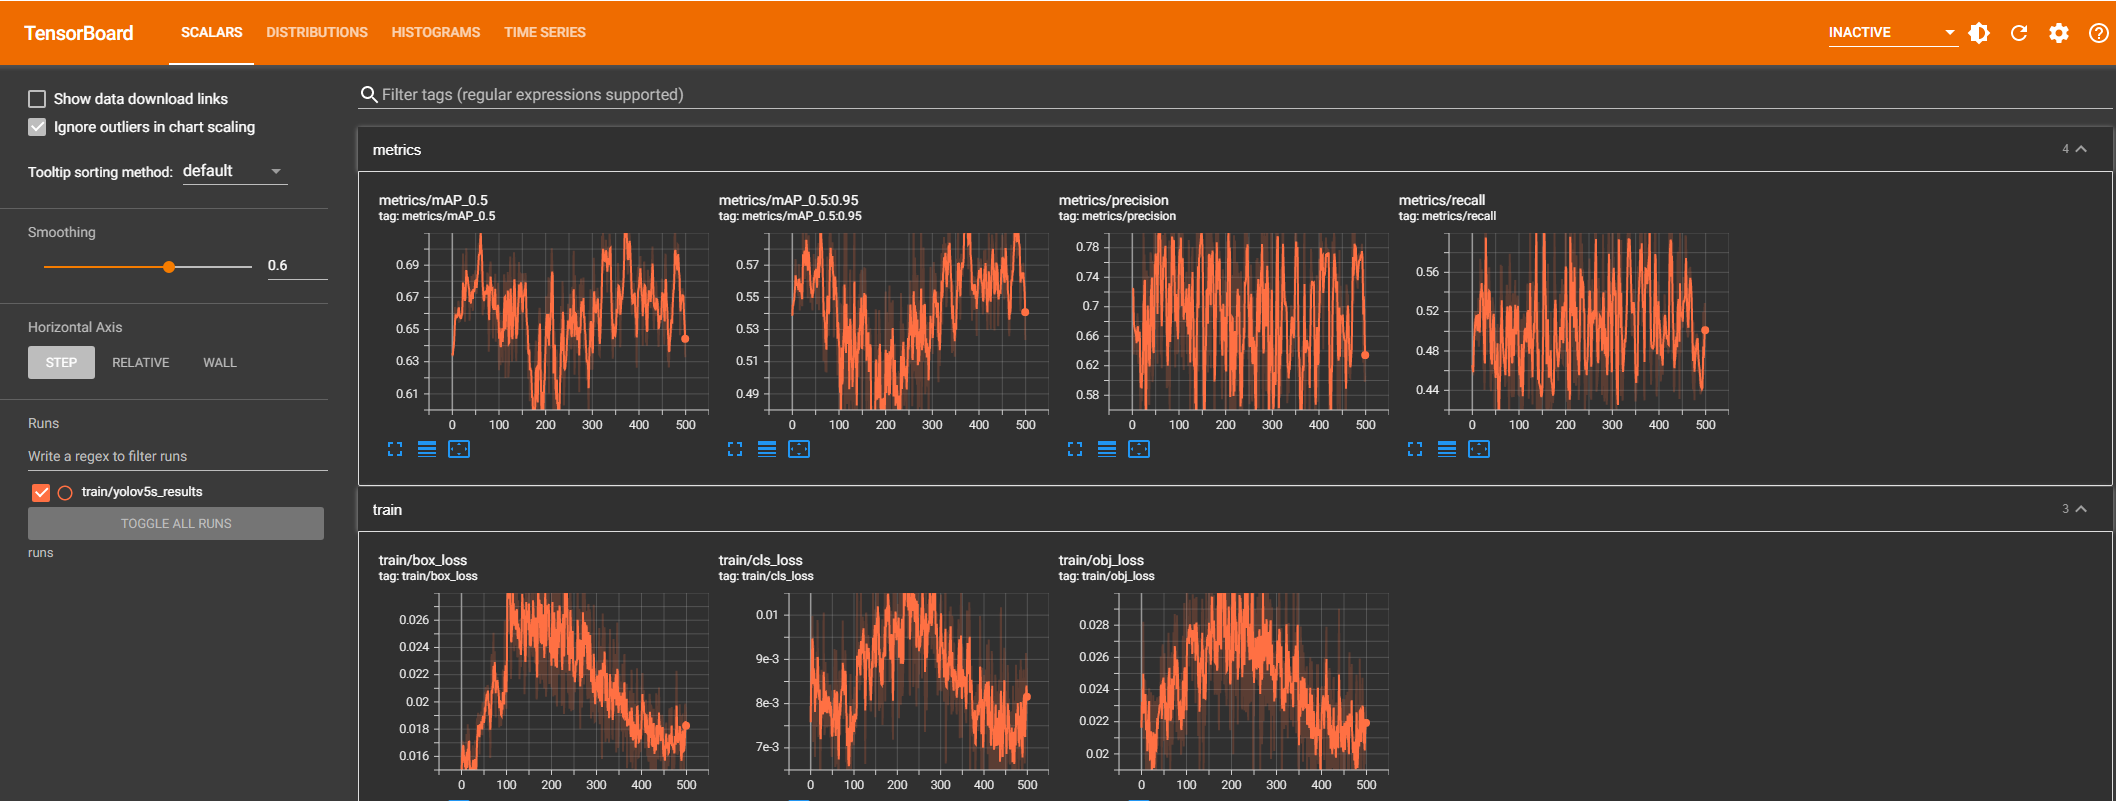

##(20 pts) Task 4. Connect your model to Webcam streaming

Enable your model to predict in real-time on a web camera, using your custom model. If the objects you train your model to are not something commonly available, please provide the web cam code and a pre-recorded video of you detecting the object. 

Hint: On the left hand side, Google Colab gives you code for accessing your webcam with Javascript. Use this code to get your webcam working. YOLO has a webcam input functionality built-in, but you cannot use this functionality, because it is attempting to open the webcam on Google's server and not your laptop. To execute this step

1.   Modify the webcam code so that it will open the webcam,
2.   take a picture,
1.   close the webcam,
2.   run the detection algorithm,
1.   display the detection image
2.   and then repeat 5 times.

This will not be the same as real-time webcam footage, but it will get you as close as you can get on Google Colab. 


<IPython.core.display.Javascript object>

Saved to photo.jpg


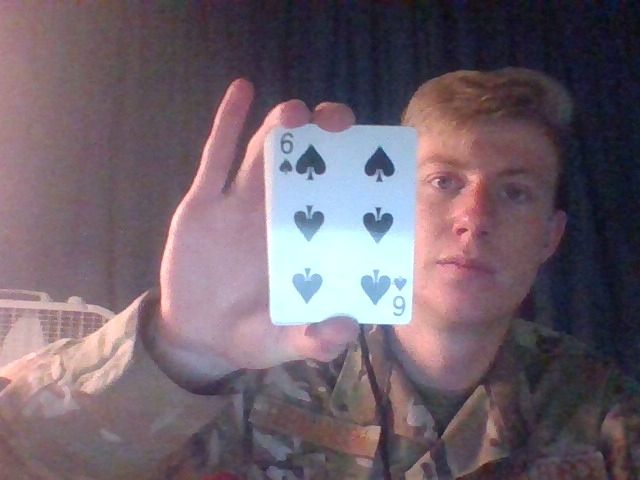

/content/yolov5
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.2, device='', exist_ok=False, img_size=416, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=True, source='/content/yolov5/photo.jpg', update=False, view_img=False, weights=['/content/70perc.pt'])
YOLOv5 v4.0-126-g886f1c0 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 
/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 232 layers, 7384065 parameters, 0 gradients, 17.2 GFLOPS
image 1/1 /content/yolov5/photo.jpg: 320x416 Done. (0.023s)
Results saved to runs/detect/exp
0 labels saved to runs/detect/exp/labels
Done. (0.046s)


<IPython.core.display.Javascript object>

Saved to photo.jpg


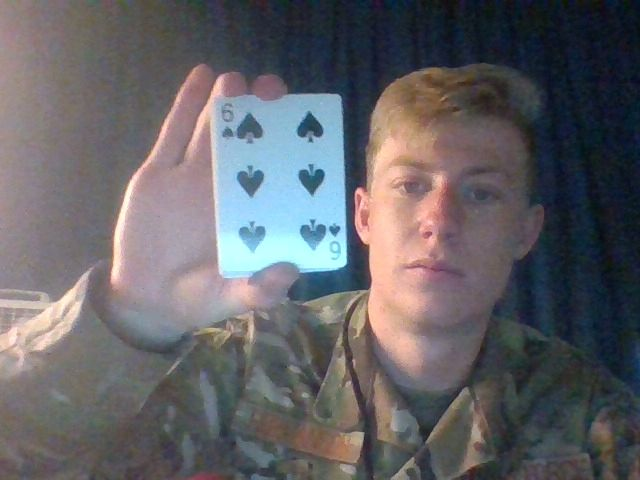

/content/yolov5
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.2, device='', exist_ok=False, img_size=416, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=True, source='/content/yolov5/photo.jpg', update=False, view_img=False, weights=['/content/70perc.pt'])
YOLOv5 v4.0-126-g886f1c0 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 
/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 232 layers, 7384065 parameters, 0 gradients, 17.2 GFLOPS
image 1/1 /content/yolov5/photo.jpg: 320x416 Done. (0.022s)
Results saved to runs/detect/exp2
0 labels saved to runs/detect/exp2/labels
Done. (0.036s)


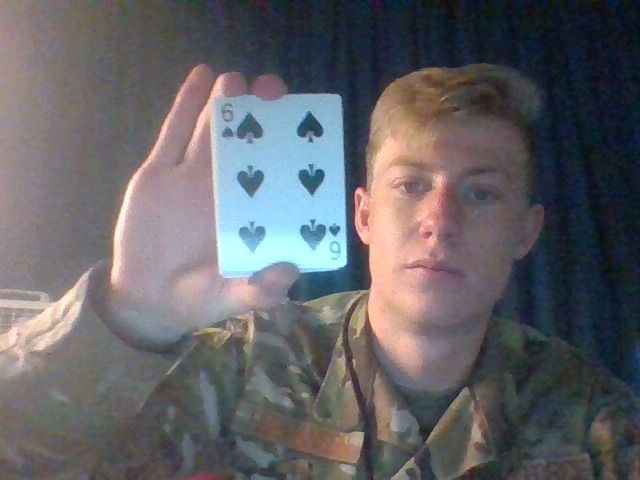

<IPython.core.display.Javascript object>

Saved to photo.jpg


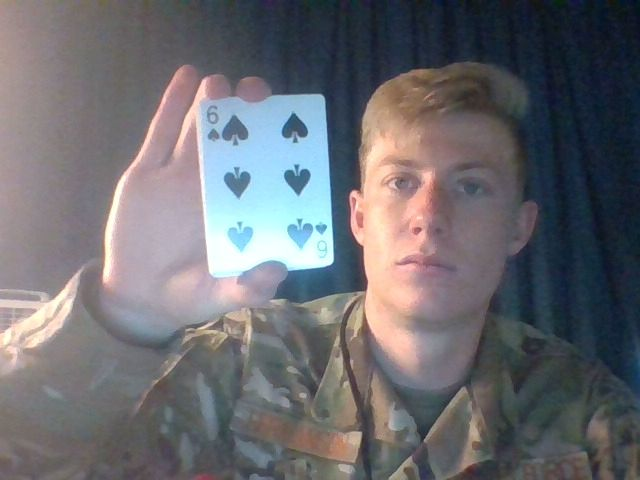

/content/yolov5
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.2, device='', exist_ok=False, img_size=416, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=True, source='/content/yolov5/photo.jpg', update=False, view_img=False, weights=['/content/70perc.pt'])
YOLOv5 v4.0-126-g886f1c0 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 
/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 232 layers, 7384065 parameters, 0 gradients, 17.2 GFLOPS
image 1/1 /content/yolov5/photo.jpg: 320x416 Done. (0.023s)
Results saved to runs/detect/exp3
0 labels saved to runs/detect/exp3/labels
Done. (0.036s)


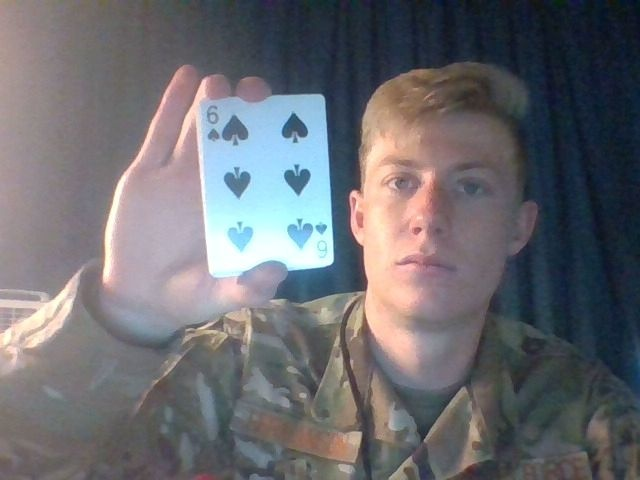

<IPython.core.display.Javascript object>

Saved to photo.jpg


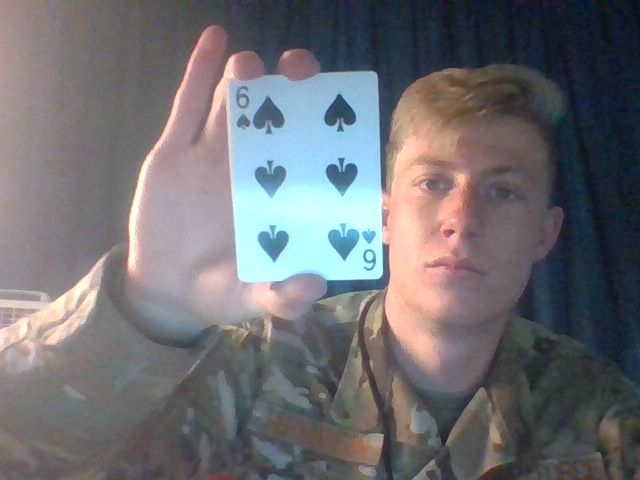

/content/yolov5
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.2, device='', exist_ok=False, img_size=416, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=True, source='/content/yolov5/photo.jpg', update=False, view_img=False, weights=['/content/70perc.pt'])
YOLOv5 v4.0-126-g886f1c0 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 
/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 232 layers, 7384065 parameters, 0 gradients, 17.2 GFLOPS
image 1/1 /content/yolov5/photo.jpg: 320x416 Done. (0.024s)
Results saved to runs/detect/exp4
0 labels saved to runs/detect/exp4/labels
Done. (0.037s)


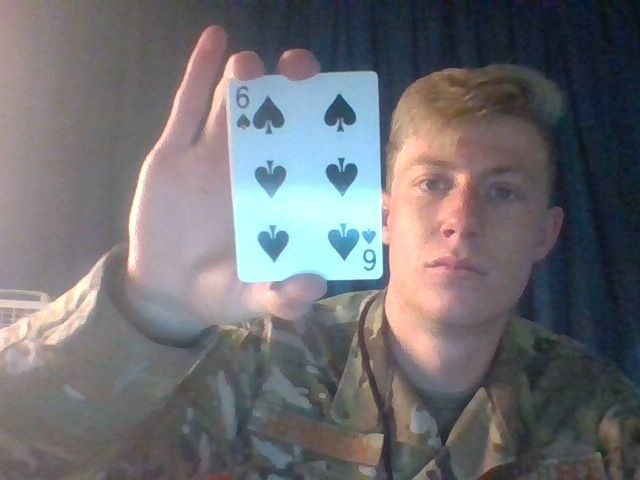

<IPython.core.display.Javascript object>

Saved to photo.jpg


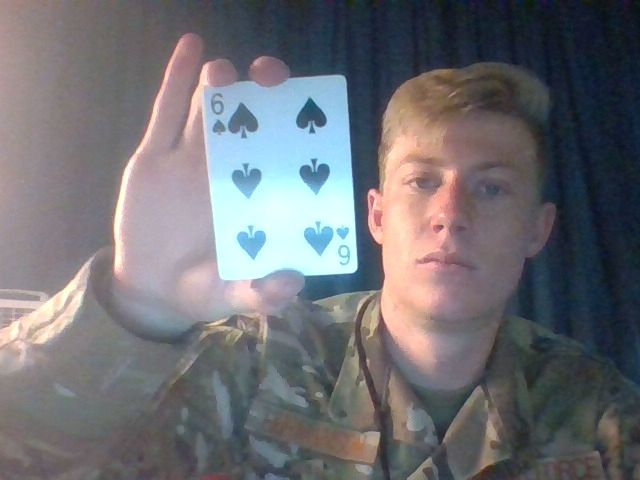

/content/yolov5
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.2, device='', exist_ok=False, img_size=416, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=True, source='/content/yolov5/photo.jpg', update=False, view_img=False, weights=['/content/70perc.pt'])
YOLOv5 v4.0-126-g886f1c0 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 
/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 232 layers, 7384065 parameters, 0 gradients, 17.2 GFLOPS
image 1/1 /content/yolov5/photo.jpg: 320x416 Done. (0.024s)
Results saved to runs/detect/exp5
0 labels saved to runs/detect/exp5/labels
Done. (0.044s)


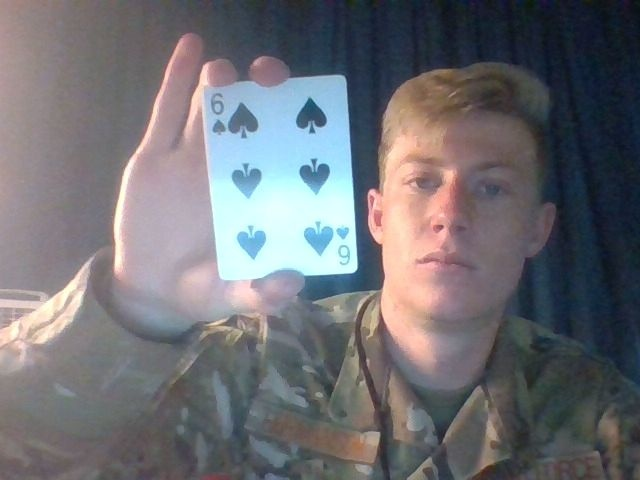

In [ ]:
from IPython.display import display, Javascript

from google.colab.output import eval_js

from base64 import b64decode



def take_photo(filename = 'photo.jpg', quality=0.8):

  js = Javascript('''

    async function takePhoto(quality) {

      const div = document.createElement('div');

      const capture = document.createElement('button');

      capture.textContent = 'Capture';

      div.appendChild(capture);



      const video = document.createElement('video');

      video.style.display = 'block';

      const stream = await navigator.mediaDevices.getUserMedia({video: true});



      document.body.appendChild(div);

      div.appendChild(video);

      video.srcObject = stream;

      await video.play();



      // Resize the output to fit the video element.

      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);



      // Wait for Capture to be clicked.

      //await new Promise((resolve) => capture.onclick = resolve);



      const canvas = document.createElement('canvas');

      canvas.width = video.videoWidth;

      canvas.height = video.videoHeight;

      canvas.getContext('2d').drawImage(video, 0, 0);

      stream.getVideoTracks()[0].stop();

      div.remove();

      return canvas.toDataURL('image/jpeg', quality);

    }

    ''')

  display(js)

  data = eval_js('takePhoto({})'.format(quality))

  binary = b64decode(data.split(',')[1])

  with open(filename, 'wb') as f:

    f.write(binary)

  return filename

  from IPython.display import Image

#try:

  #filename = take_photo()

  #print('Saved to {}'.format(filename))

  

  # Show the image which was just taken.

  #display(Image(filename))

#except Exception as err:

  # Errors will be thrown if the user does not have a webcam or if they do not

  # grant the page permission to access it.

  #print(str(err))
import glob
import os
from IPython.display import Image, display
for file in range(5):
    filename = take_photo()
    print('Saved to {}'.format(filename))
    display(Image(filename))
    %cd /content/yolov5/

    !python3 detect.py --weights /content/70perc.pt --img 416 --conf 0.2  --source /content/yolov5/photo.jpg --save-txt

    list = os.listdir('/content/yolov5/runs/detect') # dir is your directory path
    number_files = len(list)
    a = '/content/yolov5/runs/detect/exp'
    b = a+str(number_files)
    c = b+'/*.jpg'
    for imageName in glob.glob(c): 
        display(Image(filename=imageName))
        print("\n")




###Answer to Task 4
(Optional) Add pre-recorded video, if necessary.

##(10 pts) Task 5. Create something interesting using your model

You have a limited time, so don't make this a huge feature, just something cool your model could do. For example, something that counts the objects coming across the webcam would receive full points. If you have a more creative idea, I may be inclined to add some bonus points, but make sure you are taking care of your other classwork as well. 

In [ ]:
!python3 detect.py -h

usage: detect.py [-h] [--weights WEIGHTS [WEIGHTS ...]] [--source SOURCE]
                 [--img-size IMG_SIZE] [--conf-thres CONF_THRES]
                 [--iou-thres IOU_THRES] [--device DEVICE] [--view-img]
                 [--save-txt] [--save-conf] [--classes CLASSES [CLASSES ...]]
                 [--agnostic-nms] [--augment] [--update] [--project PROJECT]
                 [--name NAME] [--exist-ok]

optional arguments:
  -h, --help            show this help message and exit
  --weights WEIGHTS [WEIGHTS ...]
                        model.pt path(s)
  --source SOURCE       source
  --img-size IMG_SIZE   inference size (pixels)
  --conf-thres CONF_THRES
                        object confidence threshold
  --iou-thres IOU_THRES
                        IOU threshold for NMS
  --device DEVICE       cuda device, i.e. 0 or 0,1,2,3 or cpu
  --view-img            display results
  --save-txt            save results to *.txt
  --save-conf           save confidences in --save-txt labels
 

In [ ]:
list = os.listdir('/content/yolov5/runs/detect') # dir is your directory path
number_files = len(list)
a = '/content/yolov5/runs/detect/exp'
b = a+str(number_files)
c = b+'/labels'
d = c+'/photo.txt'
list1 = os.listdir(c) # dir is your directory path
number_files1 = len(list1)
if number_files1 != 0:
  f = open(d, "r")
  Counter = 0
  
  # Reading from file
  Content = f.read()
  CoList = Content.split("\n")
  
  for i in CoList:
      if i:
          Counter += 1
          
  print("This is the number of cards detected:")
  print(Counter)
else:
  print("No cards detected")

No cards detected


### (10 pts) Task 6. Write 300-500 words on the ethical implications of your project.
Make sure you support your thoughts with ethical frameworks from ACM, IEEE, or any other reputible source. 


Initially, when looking at our algorithm and its use of YOLO to detect the suit and value of a card, it seems harmless and has no potentially ethical concerns except for the competitive integrity in the game of poker. Referencing the IEEE Ethics of Autonomous and Intelligent Systems, the standards document speaks to how A/IS (Artificial Intelligence or Autonomous Systems) should strive to uphold social values such as fairness.

In the game of poker, players are not allowed to use outside resources to gain advantage such as use of a poker solving calculator. These are not feasible to bring to the poker table for regular players as one would have to manually type each card into the calculator. However, it is not difficult to imagine a more sophisticated implementation of our algorithm which is able to quickly snap a screenshot of the flop, turn, and river and would import this hand into a poker calculator. This calculator would quickly notify the user of the most optimal action to take, which iis in complete violation of the game of poker and its competitive integrity as the user would have an unfair advantage over other players at the table. This hypothetical situation is therefore in violation of the fairness of social value. Currently, there have already been developed poker solvers, but the use is solely for the purposes of informing the audience and viewers of optimal strategy and does not affect the action of the players.

Similarly, the ACM Code of Ethics principle 1.4 states that one should “Be fair and take action not to discriminate.” Access to a poker solver such as this system would give a large advantage to those with access due to their ability to instantly see what hand they have and what may potentially come. One of the toughest parts of poker for a beginner to learn is the identification of the “board” as well as their own hand strength. Giving access to such a solver may actually detriment beginners as they would not learn and develop skills that they may need in a live poker game, while still giving them an advantage while the solver is in use.

In its current form, the ethical perspective on our poker identifier is of minimal concern. However, using this identifier along with solving algorithms and creating more advanced functionality can quickly lead down a slippery slope that makes the game unfair between those with and without access to such critical technology.